❗ 파일 주소는 각자 수정해주세요...

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./data/okcupid_profiles.csv')

In [7]:
# 필요 컬럼
required_cols = [
    "sex","orientation","body_type","drinks","drugs","education","height","job",
    "last_online","religion","sign","smokes"
]

# keep 컬럼
keep_cols = ["age","status","diet","ethnicity","location","pets"]

# 사용 컬럼
use_cols = required_cols + keep_cols
df = df[use_cols].copy()

In [8]:
# 성별 인코딩 
df['sex'] = df['sex'].map({"f":0, "m":1}).astype("int8")


# 성적 지향 인코딩
df["orientation"] = df["orientation"].astype("string").str.strip().str.lower()

# 성소수자 매핑
minor_map = {
    "straight": 0,   # 이성애자
    "gay": 1,        # 동성애자 (성소수자)
    "bisexual": 1    # 양성애자 (성소수자)
}

df["orientation"] = df["orientation"].map(minor_map).astype("int8")


# height 전처리
df = df.drop(df.index[df['height'].isna()])     # 결측치 3개 제거
df = df.drop(df.index[df['height'] < 30])       # 이상치 7개 제거 : 30inch = 76.2cm

In [9]:
# 석사 이상
high_edu = ['graduated from masters program', 'working on masters program',
           'graduated from ph.d program', 'working on ph.d program',
           'graduated from med school', 'working on law school',
           'working on med school', 'dropped out of masters program',
           'masters program', 'dropped out of ph.d program',
           'ph.d program', 'law school', 'graduated from law school',
           'dropped out of law school', 'dropped out of med school',
           'med school'
]
# 대학교 졸업
univ_grad = ['graduated from college/university', 'graduated from two-year college',
             'college/university'
]
# 대학교 재학
univ_ing = ['working on college/university', 'working on two-year college',
            'dropped out of college/university', 'two-year college',
            'dropped out of two-year college'
]
# 고등학교 졸업 이하
high_school = ['graduated from high school', 'dropped out of high school',
               'high school', 'working on high school'
]
# 나머지
other = ['graduated from space camp', 'dropped out of space camp',
         'working on space camp', 'space camp'
]
# education 컬럼 값 통합
df['education'] = df['education'].replace(high_edu, 4)
df['education'] = df['education'].replace(univ_grad, 3)
df['education'] = df['education'].replace(univ_ing, 2)
df['education'] = df['education'].replace(high_school, 1)
df['education'] = df['education'].replace(other, 0)

# 범주형 변수 원-핫 인코딩
# df = pd.get_dummies(df, columns=['education'], drop_first=True)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1868\2648810172.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace(other, 0)


In [10]:
def classify_belief(text):
    # 결측치 처리 (NaN이면 안 믿는다로 분류)
    if pd.isna(text):
        return 0
    
    # 믿는 그룹의 키워드가 포함되어 있는지 확인
    if "fun to think about" in text or "matters a lot" in text:
        return 1
    
    # 그 외 (doesn't matter 또는 별자리 이름만 있는 경우)
    else:
        return 0

# 새로운 컬럼 생성 (두번 실행 금지)
df['sign'] = df['sign'].apply(classify_belief)

# 결과 확인
print(df['sign'].value_counts())

sign
0    39931
1    20005
Name: count, dtype: int64


In [11]:
# used up, rather not say - 결측 처리
df["body_type"] = df["body_type"].replace({"used up": np.nan, "rather not say": np.nan})

body_map = {
    # 마름
    "thin": "slim",
    "skinny": "slim",

    # 보통
    "average": "average",

    # 건강
    "fit": "fit",
    "athletic": "fit",
    "jacked": "fit",

    # 통통
    "curvy": "curvy",
    "a little extra": "curvy",
    "full figured": "curvy",
    "overweight": "curvy",
}

df["body_type"] = df["body_type"].map(body_map)

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['body_type'])

In [12]:
# 비흡연
no_smoke = ['no']
# 가끔 흡연
sometime_smoke = ['sometimes', 'when drinking']
# 흡연
smoke = ['yes', 'trying to quit']

# smokes 컬럼 값 통합
df['smokes'] = df['smokes'].replace(no_smoke, 'no_smoke')
df['smokes'] = df['smokes'].replace(sometime_smoke, 'sometime_smoke')
df['smokes'] = df['smokes'].replace(smoke, 'smoke')

# 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['smokes'], drop_first=True)

In [13]:
# 1. 결측치 처리 (가장 빈도가 높은 'never'로 채우기)
df['drugs'] = df['drugs'].fillna('never')

# 2. 값 매핑 (never: 2, sometimes: 1, often: 0)
drug_map = {
    'never': 2,
    'sometimes': 1,
    'often': 0
}

df['drugs'] = df['drugs'].map(drug_map)

# 결과 확인
print(df['drugs'].value_counts())

drugs
2    51795
1     7732
0      409
Name: count, dtype: int64


In [14]:
df['drinks'].value_counts()

drinks_map = {
    # 안 마신다 (9224개)
    "not at all": "no_drinks",
    "rarely": "no_drinks",

    # 적당히 마신다 (41776개)
    "socially": "moderate",

    # 많이 마신다 (5954개)
    "often": "heavy",
    "very often": "heavy",
    "desperately": "heavy"
}

df["drinks"] = df["drinks"].map(drinks_map)

df = pd.get_dummies(df, columns=['drinks'], drop_first=False)

In [15]:
# 마지막 온라인 시간 - 시간 삭제
df["last_online"] = pd.to_datetime(df["last_online"].str[:10], format="%Y-%m-%d")

In [16]:
# job 컬럼 인코딩
df['job_encoding'] = np.select(
    [((df['job'] == 'science / tech / engineering') | (df['job'] == 'computer / hardware / software')),
     ((df['job'] == 'sales / marketing / biz dev') | (df['job'] == 'executive / management') | (df['job'] == 'banking / financial / real estate')),
     ((df['job'] == 'artistic / musical / writer') | (df['job'] == 'entertainment / media')),
     ((df['job'] == 'education / academia') | (df['job'] == 'medicine / health') | (df['job'] == 'political / government') | (df['job'] == 'law / legal services')),
     ((df['job'] == 'hospitality / travel') | (df['job'] == 'construction / craftsmanship') | (df['job'] == 'clerical / administrative') | (df['job'] == 'transportation') | (df['job'] == 'military'))],
     # student, unemployed, retired, other, rather not say, 결측치는 모두 6
    [1, 2, 3, 4, 5],
    default=6
)

# job_encoding 컬럼의 value_count() 출력
print(df['job_encoding'].value_counts())

job_encoding
6    21626
1     9555
4     9281
2     9030
3     6685
5     3759
Name: count, dtype: int64


In [17]:
# 무교
religion_none = ['agnosticism', 'atheism', 
                 'atheism and laughing about it', 'atheism but not too serious about it',
                 'atheism and somewhat serious about it', 'agnosticism but not too serious about it',
                 'agnosticism and laughing about it', 'agnosticism and somewhat serious about it',
                 'atheism and very serious about it', 'agnosticism and very serious about it',
                 ]
# 종교 신자
religion = ['other', 'catholicism but not too serious about it',
            'other and laughing about it', 'christianity',
            'christianity but not too serious about it', 'other but not too serious about it',
            'judaism but not too serious about it', 'catholicism',
            'christianity and somewhat serious about it', 'other and somewhat serious about it',
            'catholicism and laughing about it', 'judaism and laughing about it',
            'buddhism but not too serious about it', 'judaism',
            'christianity and very serious about it', 'catholicism and somewhat serious about it',
            'other and very serious about it', 'buddhism and laughing about it',
            'buddhism', 'christianity and laughing about it',
            'buddhism and somewhat serious about it', 'judaism and somewhat serious about it',
            'hinduism but not too serious about it', 'hinduism', 'catholicism and very serious about it',
            'buddhism and very serious about it', 'hinduism and somewhat serious about it',
            'islam', 'hinduism and laughing about it', 'islam but not too serious about it',
            'islam and somewhat serious about it', 'judaism and very serious about it',
            'islam and laughing about it', 'hinduism and very serious about it', 'islam and very serious about it']
# religion 컬럼 값 통합
df['religion'] = df['religion'].replace(religion_none, 'no_religion')
df['religion'] = df['religion'].replace(religion, 'religion')
# 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['religion'], drop_first=False)
# status 컬럼 인코딩

df['status_encoding'] = np.select(
    [df['status'] == 'single'], 
    [1],
    default=0
)
# status_encoding 컬럼의 value_count() 출력
print(df['status_encoding'].value_counts())

status_encoding
1    55687
0     4249
Name: count, dtype: int64


In [18]:
# status 컬럼 인코딩

df['status_encoding'] = np.select(
    [df['status'] == 'single'], 
    [1],
    default=0
)
# status_encoding 컬럼의 value_count() 출력
print(df['status_encoding'].value_counts())

status_encoding
1    55687
0     4249
Name: count, dtype: int64


In [19]:
 # age 이상치 제거 (70세 이상) 
df = df[df["age"].between(18, 70)].copy()

# 연령대별 그룹핑
df["age_group"] = (df["age"] // 10 * 10).astype(int)
print(df["age_group"].value_counts())

age_group
20    27817
30    19841
40     7337
50     2860
60     1159
10      920
Name: count, dtype: int64


In [20]:
# diet 컬럼 인코딩

df['diet_encoding'] = np.select(
    [((df['diet'] == 'vegetarian') | (df['diet'] == 'mostly vegetarian') | (df['diet'] == 'strictly vegetarian') |\
      (df['diet'] == 'vegan') | (df['diet'] == 'mostly vegan') | (df['diet'] == 'strictly vegan'))], 
    [1],
    default=0
)

# diet_encoding 컬럼의 value_count() 출력
print(df['diet_encoding'].value_counts())

diet_encoding
0    54247
1     5687
Name: count, dtype: int64


In [21]:
# 전체 데이터 리스트화
all = df['ethnicity'].value_counts().index.tolist()
# mixed가 아닌거 리스트
mixed_none = ['white', 'asian', 'black', 'hispanic / latin', 'other']
# mixed
remaining = [item for item in all if item not in mixed_none]
# mixed로 통합
df['ethnicity'] = df['ethnicity'].replace(remaining, 'mixed')
# 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['ethnicity'], drop_first=False)

In [22]:
# pets 컬럼 인코딩 -> dogs_encoding, cats_encoding

df['dogs_encoding'] = np.select(
    [((df['pets'] == 'has dogs') | (df['pets'] == 'likes dogs and likes cats') |\
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes dogs') |\
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and dislikes cats') |\
      (df['pets'] == 'has dogs and likes cats') | (df['pets'] == 'likes dogs and dislikes cats'))], 
    [1],
    default=0
)

df['cats_encoding'] = np.select(
    [((df['pets'] == 'has cats') | (df['pets'] == 'likes dogs and likes cats') |\
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes cats') |\
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and likes cats') |\
      (df['pets'] == 'dislikes dogs and likes cats') | (df['pets'] == 'dislikes dogs and has cats'))], 
    [1],
    default=0
)

# dogs_encoding 컬럼과 cats_encoding 컬럼의 value_count() 출력
print(df['dogs_encoding'].value_counts())
print(df['cats_encoding'].value_counts())

dogs_encoding
1    36867
0    23067
Name: count, dtype: int64
cats_encoding
0    34215
1    25719
Name: count, dtype: int64


In [23]:
# city 추출
df["location"] = df["location"].astype("string").str.strip().str.lower()
df["city"] = df["location"].str.split(",").str[0].str.strip()

# 지역 매핑
SF = {"san francisco"}

PENINSULA_SOUTH_BAY = {
    "daly city", "south san francisco", "san bruno", "millbrae", "san mateo",
    "burlingame", "foster city", "belmont", "san carlos", "redwood city",
    "redwood shores", "menlo park", "atherton", "east palo alto",
    "palo alto", "mountain view", "stanford", "brisbane", "colma", "hillsborough",
    "pacifica", "half moon bay", "montara", "moss beach", "el granada"
}

EAST_BAY = {
    "oakland", "west oakland", "berkeley", "alameda", "emeryville", "albany",
    "hayward", "san leandro", "san lorenzo", "castro valley", "union city", "fremont",
    "richmond", "point richmond", "el cerrito", "san pablo", "el sobrante", "pinole", "hercules",
    "walnut creek", "pleasant hill", "martinez", "lafayette", "orinda", "moraga", "concord",
    "piedmont", "kensington", "pacheco", "rodeo", "crockett", "port costa", "oakley"
}

NORTH_BAY = {
    "sausalito", "mill valley", "tiburon", "belvedere tiburon", "larkspur", "corte madera",
    "kentfield", "fairfax", "san anselmo", "san rafael", "ross", "green brae",
    "marin city", "bolinas", "lagunitas", "woodacre", "forest knolls", "nicasio",
    "olema", "muir beach", "stinson beach", "novato",
    "petaluma", "rohnert park", "santa rosa",
    "vallejo", "benicia", "vacaville"
}

# 지역 매핑 함수
def map_bay_region(city: str) -> str:
    if pd.isna(city):
        return np.nan
    if city in SF:
        return "sf"
    if city in PENINSULA_SOUTH_BAY:
        return "south_bay"
    if city in EAST_BAY:
        return "east_bay"
    if city in NORTH_BAY:
        return "north_bay"
    return "outside"

df["location_group"] = df["city"].apply(map_bay_region)

# 원-핫 인코딩
df = pd.get_dummies(df, columns=["location_group"], drop_first=False)

In [24]:
# 전처리 끝난 df를 CSV로 저장 
df.to_csv("./data/okcupid_preprocessed.csv", encoding="utf-8-sig")

In [53]:
virtual_today = pd.Timestamp('2012-07-01')
df['churn'] = ( (virtual_today - df['last_online']).dt.days > 7 ).astype(int)
df['churn'].value_counts()

churn
0    35845
1    24089
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59934 entries, 0 to 59945
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   sex                         59934 non-null  int8          
 1   orientation                 59934 non-null  int8          
 2   drugs                       59934 non-null  int64         
 3   education                   53310 non-null  float64       
 4   height                      59934 non-null  float64       
 5   job                         51739 non-null  object        
 6   last_online                 59934 non-null  datetime64[ns]
 7   sign                        59934 non-null  int64         
 8   age                         59934 non-null  int64         
 9   status                      59934 non-null  object        
 10  diet                        35547 non-null  object        
 11  location                    59934 non-null  string        


<Axes: >

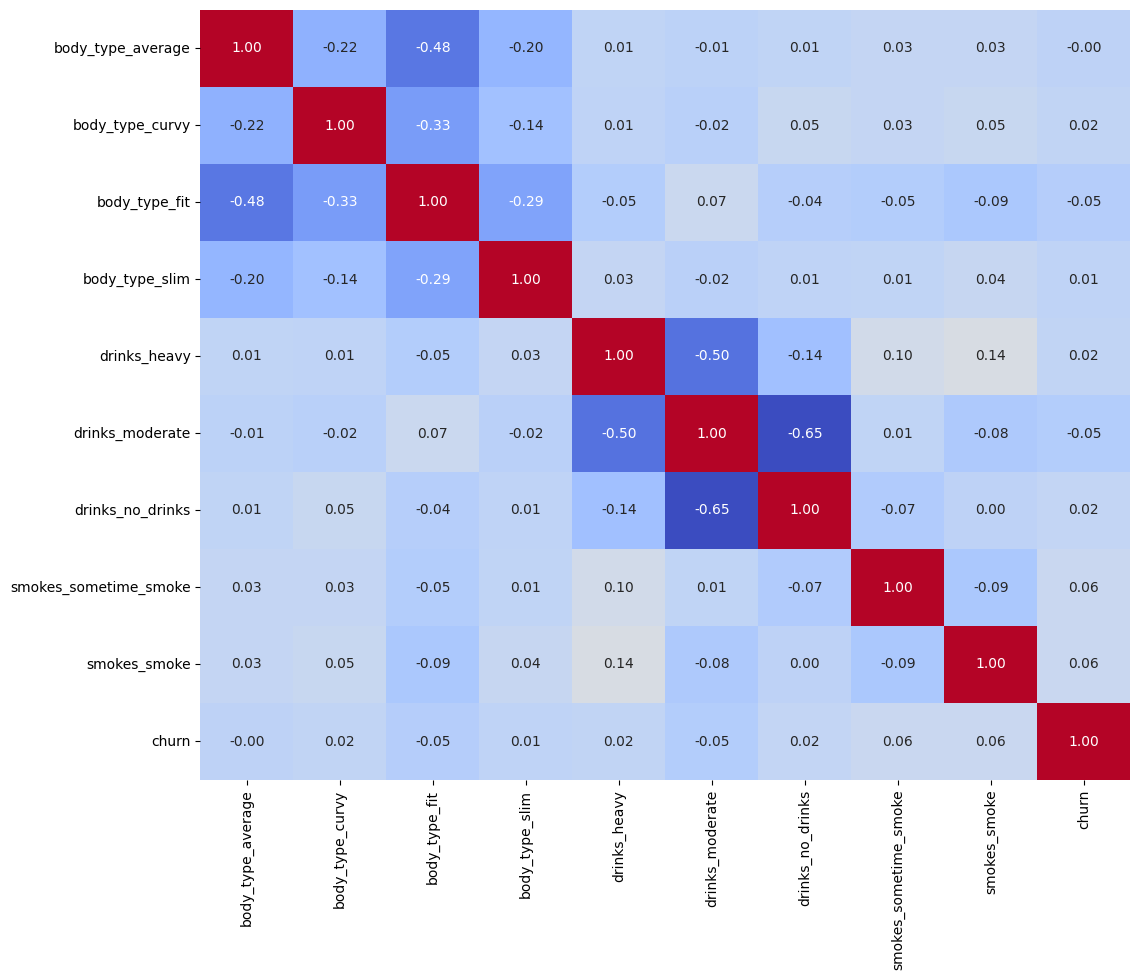

In [27]:
# 히트맵
cols = ['body_type_average', 'body_type_curvy', 'body_type_fit', 
        'body_type_slim', 'drinks_heavy','drinks_moderate',
        'drinks_no_drinks', 'smokes_sometime_smoke', 'smokes_smoke', 'churn']
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

<Axes: >

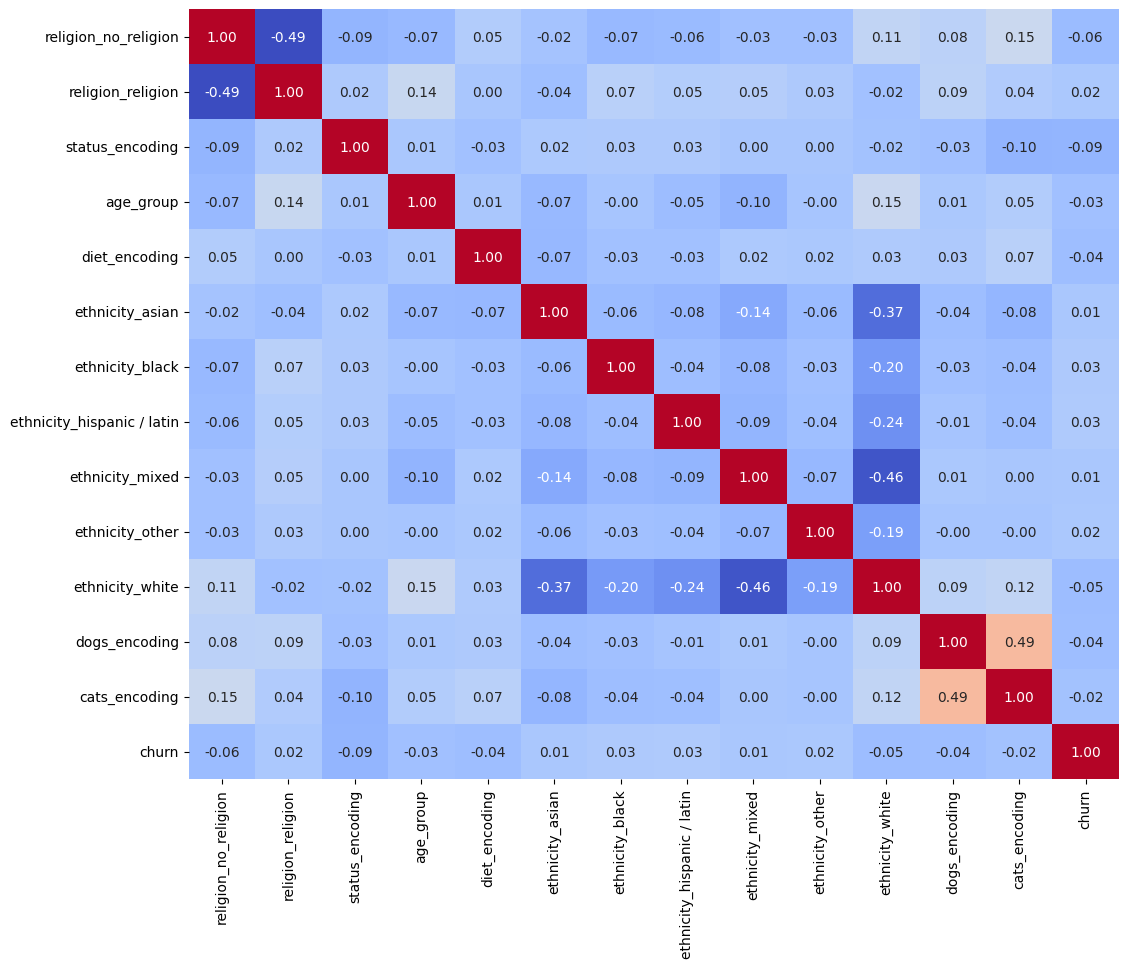

In [28]:
# 히트맵
cols = ['religion_no_religion','religion_religion','status_encoding',                   
        'age_group','diet_encoding','ethnicity_asian','ethnicity_black',                   
        'ethnicity_hispanic / latin','ethnicity_mixed','ethnicity_other',                   
        'ethnicity_white','dogs_encoding','cats_encoding', 'churn']
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

<Axes: >

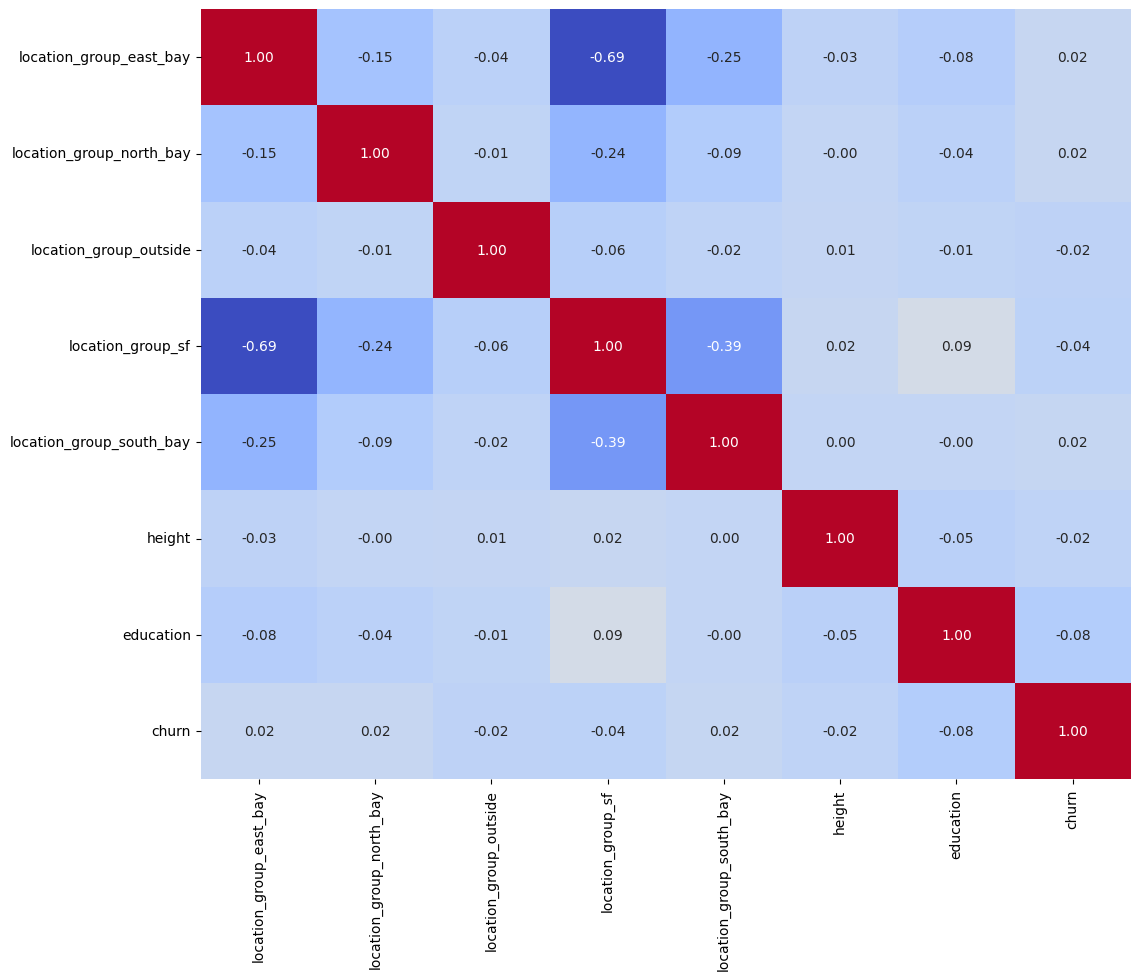

In [29]:
# 히트맵
cols = ['location_group_east_bay', 'location_group_north_bay', 'location_group_outside',            
        'location_group_sf', 'location_group_south_bay', 'height', 'education', 'churn']
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59934 entries, 0 to 59945
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   sex                         59934 non-null  int8          
 1   orientation                 59934 non-null  int8          
 2   drugs                       59934 non-null  int64         
 3   education                   53310 non-null  float64       
 4   height                      59934 non-null  float64       
 5   job                         51739 non-null  object        
 6   last_online                 59934 non-null  datetime64[ns]
 7   sign                        59934 non-null  int64         
 8   age                         59934 non-null  int64         
 9   status                      59934 non-null  object        
 10  diet                        35547 non-null  object        
 11  location                    59934 non-null  string        


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

X = df[['sex', 'orientation', 'body_type_average', 'body_type_curvy', 'body_type_fit', 
        'body_type_slim', 'drinks_heavy','drinks_moderate', 'drinks_no_drinks',
        'drugs', 'education', 'height', 'job_encoding', 'smokes_smoke', 'smokes_sometime_smoke', 'age', 'status_encoding']]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65      7140
           1       0.45      0.38      0.41      4847

    accuracy                           0.56     11987
   macro avg       0.54      0.53      0.53     11987
weighted avg       0.55      0.56      0.56     11987



In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_searchcv = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
)
grid_searchcv.fit(X_train, y_train)
print("Best Hyperparameters:", grid_searchcv.best_params_)

c:\Users\Playdata\miniconda3\envs\mlstudy_env\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [56]:
best_rf = grid_searchcv.best_estimator_
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print("\n[튜닝 후 Classification Report]")
print(classification_report(y_test, y_pred_best))


[튜닝 후 Classification Report]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      7140
           1       0.49      0.49      0.49      4847

    accuracy                           0.59     11987
   macro avg       0.58      0.57      0.58     11987
weighted avg       0.59      0.59      0.59     11987



In [57]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    best_rf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1
)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("\n[최종 모델 Classification Report]")
print(classification_report(y_test, y_pred_best))

Cross-validation scores: [0.48581837 0.48128762 0.49119555 0.48770332 0.48262346]
Mean CV score: 0.48572566530992456

[최종 모델 Classification Report]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      7140
           1       0.49      0.49      0.49      4847

    accuracy                           0.59     11987
   macro avg       0.58      0.57      0.58     11987
weighted avg       0.59      0.59      0.59     11987



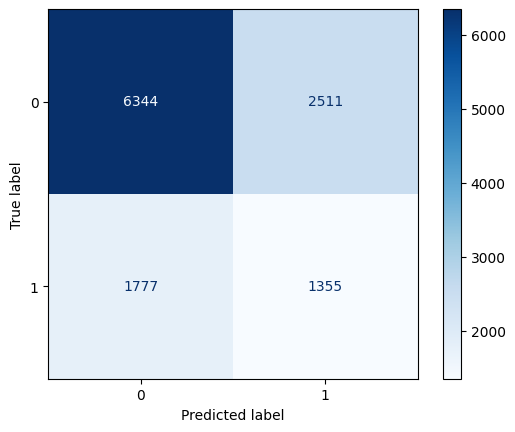

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

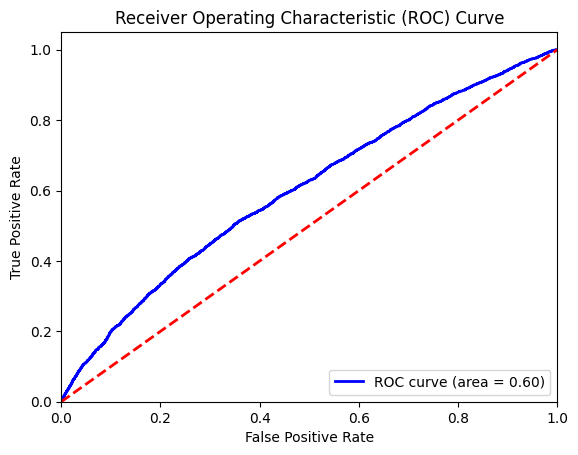

In [59]:
# ROC곡선
from sklearn.metrics import roc_curve, auc
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

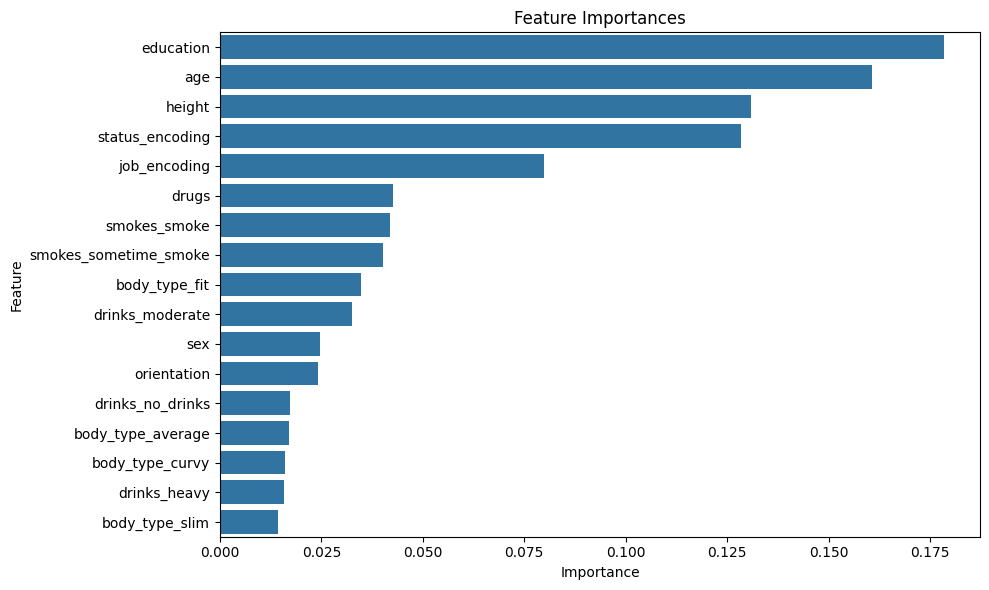

In [60]:
# 특성 중요도
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [42]:
# optuna
import optuna

def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300]),
        'max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30]),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1, 2, 4]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced'])
    }
    rf_model = RandomForestClassifier(random_state=42, **param_grid)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
    return cv_scores.mean()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)


[I 2026-02-23 09:16:49,069] A new study created in memory with name: no-name-90495748-28fc-42af-9887-6626509016ae
[I 2026-02-23 09:16:51,971] Trial 0 finished with value: 0.33454742978918556 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 2, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.33454742978918556.
[I 2026-02-23 09:16:53,963] Trial 1 finished with value: 0.37978441294635124 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.37978441294635124.
[I 2026-02-23 09:17:00,085] Trial 2 finished with value: 0.3478998258025965 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.37978441294635124.
[I 2026-02-23 09:17:10,103] Trial 3 finished with value: 0.25100953620528904 and parameters: {'n_estimators': 200

In [41]:
print("Best Hyperparameters:", study.best_params_)
best_rf_optuna = RandomForestClassifier(random_state=42, **study.best_params_)
best_rf_optuna.fit(X_train, y_train)

AttributeError: 'Study' object has no attribute 'best_params_'

In [39]:
df['body_type_average'].value_counts(), df['body_type_curvy'].value_counts(), df['body_type_fit'].value_counts(), df['body_type_slim'].value_counts()


(body_type_average
 False    45282
 True     14652
 Name: count, dtype: int64,
 body_type_curvy
 False    51928
 True      8006
 Name: count, dtype: int64,
 body_type_fit
 False    34986
 True     24948
 Name: count, dtype: int64,
 body_type_slim
 False    53447
 True      6487
 Name: count, dtype: int64)